In [36]:
%run -i ../src/utilities.py

In [23]:
# view_data_toc()

In [38]:
data_df = load_dataset('Scerevisiae_WT1_Microarray')
data_df = remove_duplicates(data_df, 'max')

In [39]:
test_df = data_df.loc[['SWI4','NRM1', 'MCM1', 'YOX1', 'FOX2', 'PLM2', 'DAT1', 'FOL2', 'SWI5', 'ACE2', 'PDH1', 'ACT1', 'NDE2'],:]

In [47]:
pyjtk_results, pydl_results, ls_results = run_periodicity(test_df, [75, 80, 85, 96, 100, 105, 120], 96, 'yeast_ma_test')

Running periodicity algorithms
Running pyJTK
-- Running pyJTK on dataset, testing period(s) of 75 80 85 96 100 105 120
-- Command used: python ../src/pyjtk/pyjtk.py ../tmp/yeast_ma_test__20211004172547.tsv -T 75 80 85 96 100 105 120 -o ../results/yeast_ma_test_pyjtk_20211004172547.tsv
-- Results saved as yeast_ma_test_pyjtk_20211004172547.tsv in the results directory
Running pyDL
-- Running pyDL on dataset, testing a period of 96
-- Command used: mpiexec -n 2 python ../src/pydl/pydl.py ../tmp/yeast_ma_test__20211004172547.tsv -T 96 -o ../results/yeast_ma_test_pydl_20211004172548.tsv -r 1 -p 1 -l True -v False
-- Results saved as yeast_ma_test_pydl_20211004172548.tsv in the results directory
Running Lomb-Scargle
INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
-- Running Lomb-Scargle on dataset, testing period(s) of [75, 80, 85, 96, 100, 105, 120]
-- Results saved as y

In [48]:
ls_results

,False_alarm_probability,Period
time_points,,
SWI4,0.052,96.0
NRM1,0.097,120.0
MCM1,1.000,120.0
YOX1,0.056,96.0
FOX2,0.840,120.0
PLM2,0.073,120.0
DAT1,1.000,120.0
FOL2,0.992,105.0
SWI5,0.478,120.0


In [41]:
dlxjtk_df = run_dlxjtk(pyjtk_results, pydl_results)

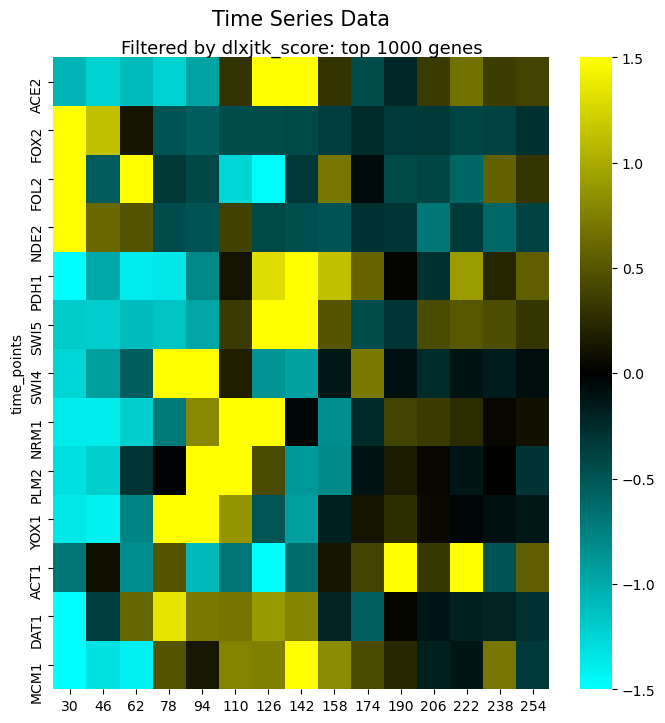

In [42]:
plot_heatmap(test_df, dlxjtk_df, 96, 'dlxjtk_score')

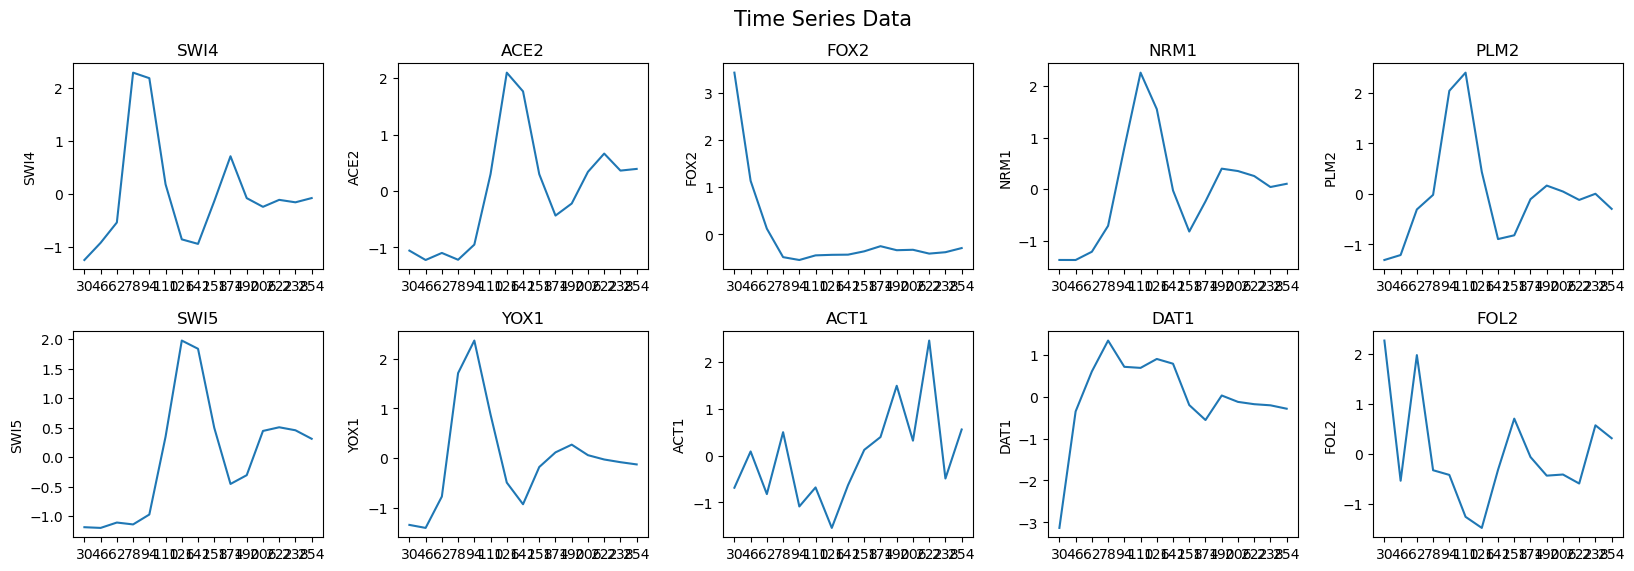

In [43]:
plot_linegraphs_from_gene_list(test_df, get_genelist_from_top_n_genes(dlxjtk_df, 'dlxjtk_score', 10), norm_data=True)

In [44]:
targets_list = get_genelist_from_top_n_genes(dlxjtk_df, 'dlxjtk_score', 12)
repressors_list = targets_list[:4]
activators_list = targets_list[3:]
print(targets_list)
print(repressors_list)
print(activators_list)

['SWI4', 'ACE2', 'FOX2', 'NRM1', 'PLM2', 'SWI5', 'YOX1', 'ACT1', 'DAT1', 'FOL2', 'MCM1', 'NDE2']
['SWI4', 'ACE2', 'FOX2', 'NRM1']
['NRM1', 'PLM2', 'SWI5', 'YOX1', 'ACT1', 'DAT1', 'FOL2', 'MCM1', 'NDE2']


In [45]:
all_scores, targets_df, localmin_df = run_lem(test_df, targets_list, repressors_list, activators_list)

-- Running LEMpy on dataset ../tmp/tmp_20211004172418.tsv
-- Command used: mpiexec -n 2 python ../src/lempy/lempy.py ../results/lempy__20211004172418/lempy_20211004172418_config.txt


KeyboardInterrupt: 

In [ ]:
make_top_edge_network(all_scores, 10)

In [143]:
ls_results = run_lomb_scargle(test_df, [80,98,100,150], 'testfile')

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
-- Running Lomb-Scargle on dataset, testing period(s) of [80, 98, 100, 150]
-- Results saved as testfile_LS_20211005121312.tsv in the results directory


In [144]:
ls_results

,False_alarm_probability,Period
time_points,,
SWI4,0.057,98.0
NRM1,0.363,100.0
MCM1,0.697,150.0
YOX1,0.056,98.0
FOX2,0.843,150.0
PLM2,0.166,100.0
DAT1,0.910,150.0
FOL2,0.998,100.0
SWI5,0.350,150.0


In [93]:
test_df.loc['SWI5',:]

30      166.669019
46      156.200133
62      236.177726
78      208.119550
94      355.434875
110    1514.053648
126    2946.209897
142    2823.646034
158    1647.089765
174     810.751345
190     941.423791
206    1600.220318
222    1654.896995
238    1610.230126
254    1483.457276
Name: SWI5, dtype: float64

In [140]:
periods = [80,98,100,150]
frequencies = np.asarray([(1/p) for p in periods])
timepoint_array = np.asarray([int(t) for t in test_df.columns])

ls_results = ls(timepoint_array, test_df.loc['SWI4',:].values, normalization='standard', center_data=True)
power = ls_results.power(frequencies)

false_alarm_prob = ls_results.false_alarm_probability(power.max(), method='bootstrap')
# best_period = period_array[np.argmax(power, axis=0)]
# return false_alarm_prob, best_period

In [142]:
print(power, power.max(), false_alarm_prob)

[0.41383564 0.58866227 0.57176123 0.22340194] 0.5886622663047173 0.06499999999999995


In [128]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [130]:
f_exp=None
ddof=0
k = power.shape[0]
f_exp = np.array([np.sum(power, axis=0) / float(k)] * k, 'f') if f_exp is None else np.asarray(f_exp, 'f')
g = 2 * np.add.reduce(power * np.log(power / f_exp))
print(g, scipy.stats.chisqprob(g, k - 1 - ddof))

0.2125270933896839 0.9755421028330937
